# Introduction to R

In this lesson I'll show you the basics of getting data into R and making some basic plots. I'll use the same data as last time - somatic mutations in GBM patients from TCGA.

The TCGA somatic mutation files have a row for each mutation in each person in the GBM cohort. The columns are information about each mutation.

I'll also use a table with age and cancer type information for all TCGA samples. The goal of today will be to find out if number of mutations in GBM is correlated with age. 

    (like the previous example demonstrating a negative correlation between beers consumed and productivity, just more .. depressing)


## Reading data into R

Before we can start making dope plots in R, we need to pass the mutation data from the file to R, which is most often done with the *read.table()* function in R.

Functions in R take the general form form : *function( argument1, argument2, argument3 )* 







For example, the cell below reads in a tab delimited text file called '~/Documents/blog/somatic_mutations/TCGA.GBM.somatic.maf' and saves the data as an R data frame object called mutations

* sep = tells read.table how the columns of data are separated (in this case by tabs '\t' is R speak for tab)
* header = tells read.table whether the first row of the file is a name for each column

In [53]:
mutations=read.table('~/Documents/blog/somatic_mutations/TCGA.GBM.somatic.maf', sep='\t', header=TRUE)

In [14]:
covariates=read.table('~/Documents/blog/somatic_mutations/TCGA.covaraiates.txt', sep='\t', header=TRUE)

Lets take a look at these two tables using the *head()* function 

In [54]:
head(mutations)

Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,⋯,ExAC_AF_NFE,ExAC_AF_OTH,ExAC_AF_SAS,GENE_PHENO,FILTER,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,GDC_Validation_Status,GDC_Valid_Somatic
MMEL1,79258,BI,GRCh38,chr1,2598772,2598772,+,Missense_Mutation,SNP,⋯,NA,NA,NA,NA,PASS,d2161f0e-bc3b-4ddc-bb93-99465f1e1bad,54c22723-d609-475c-a5aa-2fc4a2e139c8,0003003d-5d6c-4a8d-956b-f59995108b26,Unknown,False
CLSTN1,22883,BI,GRCh38,chr1,9734071,9734071,+,Nonsense_Mutation,SNP,⋯,NA,NA,NA,NA,PASS,d2161f0e-bc3b-4ddc-bb93-99465f1e1bad,54c22723-d609-475c-a5aa-2fc4a2e139c8,0003003d-5d6c-4a8d-956b-f59995108b26,Unknown,False
NMNAT1,64802,BI,GRCh38,chr1,9981076,9981076,+,Missense_Mutation,SNP,⋯,NA,NA,NA,NA,PASS,d2161f0e-bc3b-4ddc-bb93-99465f1e1bad,54c22723-d609-475c-a5aa-2fc4a2e139c8,0003003d-5d6c-4a8d-956b-f59995108b26,Unknown,False
UBE4B,10277,BI,GRCh38,chr1,10179494,10179494,+,Missense_Mutation,SNP,⋯,NA,NA,NA,NA,PASS,d2161f0e-bc3b-4ddc-bb93-99465f1e1bad,54c22723-d609-475c-a5aa-2fc4a2e139c8,0003003d-5d6c-4a8d-956b-f59995108b26,Unknown,False
RP5-845O24.3,0,BI,GRCh38,chr1,12838734,12838734,+,RNA,SNP,⋯,NA,NA,NA,NA,PASS,d2161f0e-bc3b-4ddc-bb93-99465f1e1bad,54c22723-d609-475c-a5aa-2fc4a2e139c8,0003003d-5d6c-4a8d-956b-f59995108b26,Unknown,False
SPATA21,374955,BI,GRCh38,chr1,16403757,16403757,+,Nonsense_Mutation,SNP,⋯,NA,NA,NA,NA,PASS,d2161f0e-bc3b-4ddc-bb93-99465f1e1bad,54c22723-d609-475c-a5aa-2fc4a2e139c8,0003003d-5d6c-4a8d-956b-f59995108b26,Unknown,False


In [55]:
head(covariates)

ID,SEX,AGE
TCGA-02-0003-10A-01D-1490-08,MALE,50.24932
TCGA-02-0033-10A-01D-1490-08,MALE,54.98630
TCGA-02-0047-10A-01D-1490-08,MALE,78.79178
TCGA-02-0055-10A-01D-1490-08,FEMALE,62.46027
TCGA-02-2470-10A-01D-1494-08,MALE,57.59178
TCGA-02-2483-10A-01D-1494-08,MALE,43.73699


## Navigating Data Frames

We can see how large these data frames are using the *dim()* function, which prints number of rows and number of columns

In [57]:
dim(mutations)

[1] 72102   114

In [58]:
dim(covariates)

[1] 9618    3

If you remember from last time, the mutation data from TCGA has a lot of columns. We can look at them using the *colnames()* function

In [56]:
colnames(mutations)

[1] "Hugo_Symbol"                   "Entrez_Gene_Id"               
  [3] "Center"                        "NCBI_Build"                   
  [5] "Chromosome"                    "Start_Position"               
  [7] "End_Position"                  "Strand"                       
  [9] "Variant_Classification"        "Variant_Type"                 
 [11] "Reference_Allele"              "Tumor_Seq_Allele1"            
 [13] "Tumor_Seq_Allele2"             "dbSNP_RS"                     
 [15] "dbSNP_Val_Status"              "Tumor_Sample_Barcode"         
 [17] "Matched_Norm_Sample_Barcode"   "Match_Norm_Seq_Allele1"       
 [19] "Match_Norm_Seq_Allele2"        "Tumor_Validation_Allele1"     
 [21] "Tumor_Validation_Allele2"      "Match_Norm_Validation_Allele1"
 [23] "Match_Norm_Validation_Allele2" "Verification_Status"          
 [25] "Validation_Status"             "Mutation_Status"              
 [27] "Sequencing_Phase"              "Sequence_Source"              
 [29] "Validation_Method"             "Score"                        
 [31] "BAM_File"                      "Sequencer"                    
 [33] "Tumor_Sample_UUID"             "Matched_Norm_Sample_UUID"     
 [35] "HGVSc"                         "HGVSp"                        
 [37] "HGVSp_Short"                   "Transcript_ID"                
 [39] "Exon_Number"                   "t_depth"                      
 [41] "t_ref_count"                   "t_alt_count"                  
 [43] "n_depth"                       "n_ref_count"                  
 [45] "n_alt_count"                   "all_effects"                  
 [47] "Allele"                        "Gene"                         
 [49] "Feature"                       "Feature_type"                 
 [51] "Consequence"                   "cDNA_position"                
 [53] "CDS_position"                  "Protein_position"             
 [55] "Amino_acids"                   "Codons"                       
 [57] "Existing_variation"            "ALLELE_NUM"                   
 [59] "DISTANCE"                      "TRANSCRIPT_STRAND"            
 [61] "SYMBOL"                        "SYMBOL_SOURCE"                
 [63] "HGNC_ID"                       "BIOTYPE"                      
 [65] "CANONICAL"                     "CCDS"                         
 [67] "ENSP"                          "SWISSPROT"                    
 [69] "TREMBL"                        "UNIPARC"                      
 [71] "RefSeq"                        "SIFT"                         
 [73] "PolyPhen"                      "EXON"                         
 [75] "INTRON"                        "DOMAINS"                      
 [77] "GMAF"                          "AFR_MAF"                      
 [79] "AMR_MAF"                       "ASN_MAF"                      
 [81] "EAS_MAF"                       "EUR_MAF"                      
 [83] "SAS_MAF"                       "AA_MAF"                       
 [85] "EA_MAF"                        "CLIN_SIG"                     
 [87] "SOMATIC"                       "PUBMED"                       
 [89] "MOTIF_NAME"                    "MOTIF_POS"                    
 [91] "HIGH_INF_POS"                  "MOTIF_SCORE_CHANGE"           
 [93] "IMPACT"                        "PICK"                         
 [95] "VARIANT_CLASS"                 "TSL"                          
 [97] "HGVS_OFFSET"                   "PHENO"                        
 [99] "MINIMISED"                     "ExAC_AF"                      
[101] "ExAC_AF_AFR"                   "ExAC_AF_AMR"                  
[103] "ExAC_AF_EAS"                   "ExAC_AF_FIN"                  
[105] "ExAC_AF_NFE"                   "ExAC_AF_OTH"                  
[107] "ExAC_AF_SAS"                   "GENE_PHENO"                   
[109] "FILTER"                        "src_vcf_id"                   
[111] "tumor_bam_uuid"                "normal_bam_uuid"              
[113] "GDC_Validation_Status"         "GDC_Valid_Somatic"

Lets say we want to look at a single column. There are a few ways to do this with R. 

* You can pull a single column out with the syntax *mutations\$COLUMN* the *$* symbol allows you to access a single column from a dataframe by name. 



* You can also select a column by name or number using the two dimensional format *mutations[, "COLUMN"]* *mutations[,9]*
    * the *[,]* syntax allows you to access specific *[ rows , ]* and *[, columns]* of a data frame


Below I demonstrate 4 different ways of getting the same data from the mutations data frame. I use the head command since I know the dataframes are huge and I don't want to fill up the screen with text

In [73]:
head(mutations$Variant_Classification)
head(mutations[, 'Variant_Classification'])
head(mutations[,9])
mutations[1:6,9]

[1] Missense_Mutation Nonsense_Mutation Missense_Mutation Missense_Mutation
[5] RNA               Nonsense_Mutation
12 Levels: Frame_Shift_Del Frame_Shift_Ins In_Frame_Del ... Translation_Start_Site

[1] Missense_Mutation Nonsense_Mutation Missense_Mutation Missense_Mutation
[5] RNA               Nonsense_Mutation
12 Levels: Frame_Shift_Del Frame_Shift_Ins In_Frame_Del ... Translation_Start_Site

[1] Missense_Mutation Nonsense_Mutation Missense_Mutation Missense_Mutation
[5] RNA               Nonsense_Mutation
12 Levels: Frame_Shift_Del Frame_Shift_Ins In_Frame_Del ... Translation_Start_Site

[1] Missense_Mutation Nonsense_Mutation Missense_Mutation Missense_Mutation
[5] RNA               Nonsense_Mutation
12 Levels: Frame_Shift_Del Frame_Shift_Ins In_Frame_Del ... Translation_Start_Site

In the last example I demonstrate using ranges like *1:6* to select rows 1 through 6. The same syntax can be used to select multiple columns by number

This column indicates the coding consequence of each mutation, therefore is categorical data. A quick way to summarize categorical data in R is to use the *table()* function. This will output the number of times each unique value appears.

In [77]:
table(mutations$Variant_Classification)


       Frame_Shift_Del        Frame_Shift_Ins           In_Frame_Del 
                  1530                   1279                    128 
          In_Frame_Ins      Missense_Mutation      Nonsense_Mutation 
                    87                  42546                   3449 
      Nonstop_Mutation                    RNA                 Silent 
                    60                   8393                  13060 
           Splice_Site        Targeted_Region Translation_Start_Site 
                  1471                     37                     62 

A word to the wise - don't use table on a column of continuous numeric data ( or anything with more than 10-20 categories ) - it will run forever and give you a huge and messy table. 

You can summarize numeric data with the *summary()* function

In [78]:
summary(mutations$t_depth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    56.0   111.0   169.5   203.0  9387.0 

Here we can see the range and quartiles of the t_depth columns ( the read depth in the tumor for each mutation). I generally prefer to plot numeric data rather than using the summary function

## Plotting in R

We don't really care too much about the read depth data, but lets get our feet wet with three basic R plots using the depth data.

In [28]:
aggmut = aggregate(Variant_Type ~ Matched_Norm_Sample_Barcode, data=mutations, FUN=length)

In [30]:
fin=merge(aggmut, covariates, by.x='Matched_Norm_Sample_Barcode', by.y='ID')

In [31]:
dim(fin)

[1] 315   4

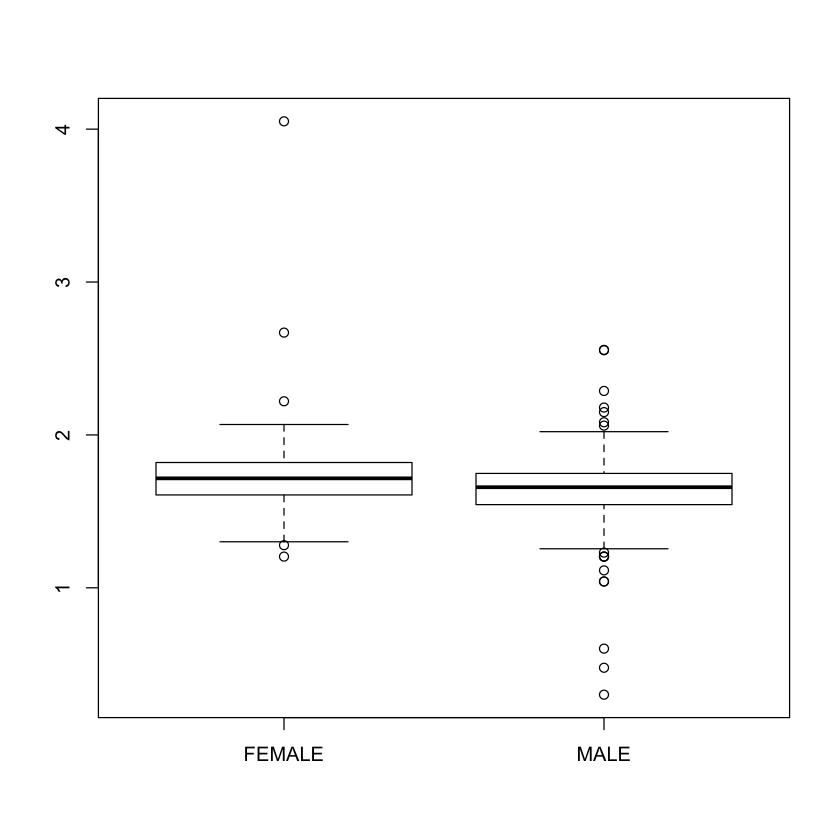

In [33]:
boxplot(log10(fin$Variant_Type) ~ fin$SEX)

In [34]:
table(fin$SEX)


FEMALE   MALE 
   111    198 

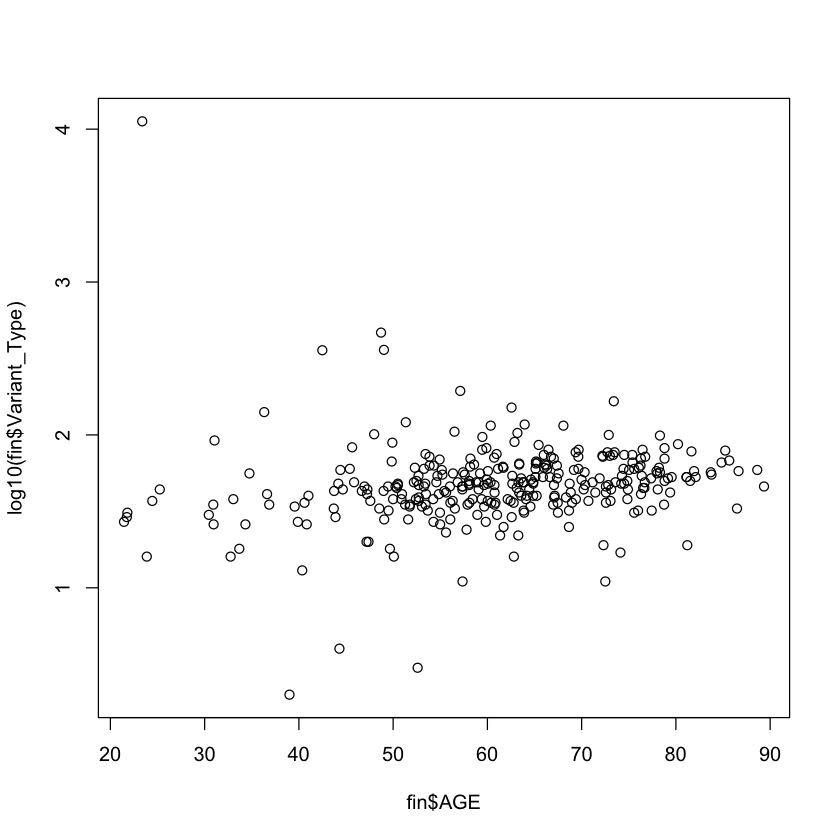

In [45]:
plot(log10(fin$Variant_Type) ~ fin$AGE)

In [43]:
cor(log10(fin$Variant_Type) , fin$AGE, use="complete.obs")

[1] 0.1272514

In [46]:
fin[ fin$Variant_Type > 1000,]

,Matched_Norm_Sample_Barcode,Variant_Type,SEX,AGE
100,TCGA-06-5416-10A-01D-1486-08,11250,FEMALE,23.37808


In [50]:
cor(log10(fin[ ! fin$Matched_Norm_Sample_Barcode %in% c('TCGA-06-5416-10A-01D-1486-08'),]$Variant_Type) , 
    fin[ ! fin$Matched_Norm_Sample_Barcode %in% c('TCGA-06-5416-10A-01D-1486-08'),]$AGE, use="complete.obs")

[1] 0.2405668

In [49]:
fin[ !( fin$ID %in% c('TCGA-06-5416-10A-01D-1486-08')),]$AGE

numeric(0)

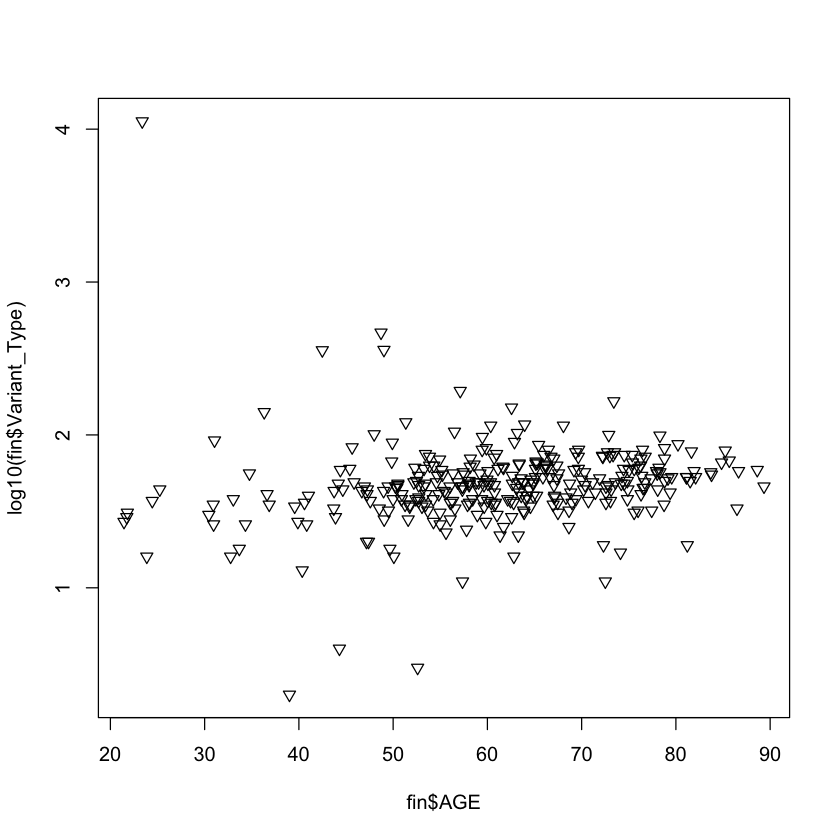

In [52]:
plot(log10(fin$Variant_Type) ~ fin$AGE, pch=6)